In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
# Read the Titanic dataset from a CSV file into a Pandas DataFrame
Data = pd.read_csv('titanic.csv')

# Display the first 5 rows of the DataFrame to get an overview of the data
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


в файле titanic.csv каждая строчка наборов данных содержит следующие поля:

- `Survived` - целевая переменная, выжил пассажир или нет

- `Pclass` — класс пассажира (1 — высший, 2 — средний, 3 — низший);

- `Name` — имя;

- `Sex` — пол;

- `Age` — возраст;

- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника;

- `Ticket` — номер билета;

- `Fare`— плата за проезд;

- `Cabin` — каюта;

- `Embarked` — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).


In [3]:
# Create a DataFrame X containing the features (independent variables)
X = Data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Create a Series Y containing the target variable (dependent variable)
Y = Data['Survived']

In [4]:
# Reflect nulls
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
# Fill missing values in the 'Age' column with the mean age
# Fill missing values in the 'Embarked' column with the string 'None'
X = X.fillna({'Age': X.Age.mean(), 'Embarked': 'None'})

In [6]:
# Count nulls in all set
X.isnull().sum().sum()

0

In [7]:
# Get unique values in the 'Sex' column of DataFrame X
X.Sex.unique()

array(['male', 'female'], dtype=object)

In [8]:
# Convert the 'Sex' column from strings ('male' or 'female') to numerical values (1 for 'male' and 0 for 'female').
X.Sex = X.Sex.map({'male': 1, 'female': 0})

In [9]:
# Get unique values in the 'Embarked' column of DataFrame X
X.Embarked.unique()

array(['S', 'C', 'Q', 'None'], dtype=object)

In [10]:
# One-hot encode the 'Embarked' column
X = pd.get_dummies(X, columns=['Embarked'])

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Sex            891 non-null    int64  
 2   Age            891 non-null    float64
 3   SibSp          891 non-null    int64  
 4   Parch          891 non-null    int64  
 5   Fare           891 non-null    float64
 6   Embarked_C     891 non-null    bool   
 7   Embarked_None  891 non-null    bool   
 8   Embarked_Q     891 non-null    bool   
 9   Embarked_S     891 non-null    bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 45.4 KB


In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Standardize features using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Create a Logistic Regression model object
logistic_model = LogisticRegression()

# Train the model using the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = logistic_model.predict(X_test)

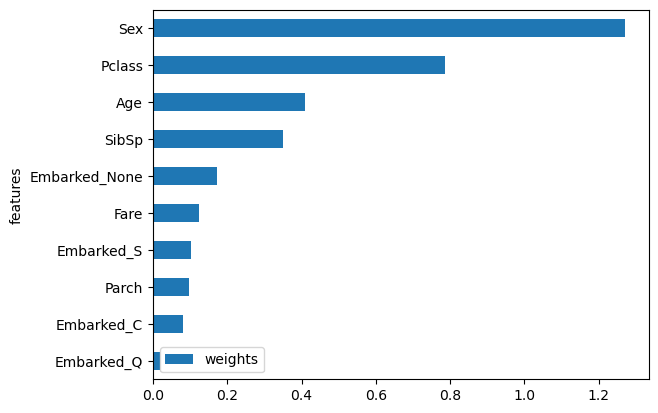

In [15]:
# Sort feature weights by absolute value in ascending order
sorted_weights = sorted(zip(abs(logistic_model.coef_.ravel()), X.columns), reverse=False)

# Extract weights and features from sorted tuples
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]

# Create a pandas DataFrame for easier plotting
df = pd.DataFrame({'features': features, 'weights': weights})

# Create a horizontal bar plot of feature weights
ax = df.plot.barh(x='features', y='weights', rot=0)

In [16]:
# Calculate and print accuracy
print('Accuracy:', round(accuracy_score(y_test, logistic_model.predict(X_test)), 4) *100, '%')

Accuracy: 81.01 %


In [17]:
# Calculate and print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[90 15]
 [19 55]]


In [20]:
# Calculate the precision
print('Precision:', round(precision_score(y_test, y_pred), 4)*100, '%')

Precision: 78.57 %


In [21]:
# Calculate the recall
print('Recall:', round(recall_score(y_test, y_pred), 4)*100, '%')

Recall: 74.32 %
